In [1]:
import numpy as np
from pylab import *
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

### *This script requires the npz files provided in the "borg_sdss_tweb", "borg_sdss_diva" and "borg_sdss_origami" packages of the BORG SDSS data release*

In [2]:
tweb = np.load('borg_sdss_tweb.npz')
diva = np.load('borg_sdss_diva.npz')
origami = np.load('borg_sdss_origami.npz')

#Minimum and maximum position along the x-axis in Mpc/h
xmin=tweb['ranges'][0]
xmax=tweb['ranges'][1]

#Minimum and maximum position along the y-axis in Mpc/h
ymin=tweb['ranges'][2]
ymax=tweb['ranges'][3]

#Minimum and maximum position along the z-axis in Mpc/h
zmin=tweb['ranges'][4]
zmax=tweb['ranges'][5]

# Information gain (Kullback-Leibler divergence) 

In [3]:
#3D probabilistic maps for structures
tweb_voids=tweb['voids']
tweb_sheets=tweb['sheets']
tweb_filaments=tweb['filaments']
tweb_clusters=tweb['clusters']
diva_voids=diva['voids']
diva_sheets=diva['sheets']
diva_filaments=diva['filaments']
diva_clusters=diva['clusters']
origami_voids=origami['voids']
origami_sheets=origami['sheets']
origami_filaments=origami['filaments']
origami_clusters=origami['clusters']

In [4]:
#Prior probabilities (numbers given in table III in Leclercq et al. 2016b)
prior_tweb_voids = 0.14261
prior_tweb_sheets = 0.59561
prior_tweb_filaments = 0.24980
prior_tweb_clusters = 0.01198
prior_diva_voids = 0.20216
prior_diva_sheets = 0.54845
prior_diva_filaments = 0.22587
prior_diva_clusters = 0.02352
prior_origami_voids = 0.89459
prior_origami_sheets = 0.06727
prior_origami_filaments = 0.02249
prior_origami_clusters = 0.01565

In [5]:
#Compute the Kullback-Leibler divergence
tweb_VlogV = tweb_voids*np.log2(tweb_voids)
tweb_SlogS = tweb_sheets*np.log2(tweb_sheets)
tweb_FlogF = tweb_filaments*np.log2(tweb_filaments)
tweb_ClogC = tweb_clusters*np.log2(tweb_clusters)
tweb_VlogV[np.isnan(tweb_VlogV)]=0.
tweb_SlogS[np.isnan(tweb_SlogS)]=0.
tweb_FlogF[np.isnan(tweb_FlogF)]=0.
tweb_ClogC[np.isnan(tweb_ClogC)]=0.

tweb_VlogPrior_V = tweb_voids*np.log2(prior_tweb_voids)
tweb_SlogPrior_S = tweb_sheets*np.log2(prior_tweb_sheets)
tweb_FlogPrior_F = tweb_filaments*np.log2(prior_tweb_filaments)
tweb_ClogPrior_C = tweb_clusters*np.log2(prior_tweb_clusters)

tweb_DKL = tweb_VlogV + tweb_SlogS + tweb_FlogF + tweb_ClogC - tweb_ClogPrior_C - tweb_SlogPrior_S - tweb_FlogPrior_F - tweb_VlogPrior_V
del tweb_VlogV, tweb_SlogS, tweb_FlogF, tweb_ClogC, tweb_ClogPrior_C, tweb_SlogPrior_S, tweb_FlogPrior_F, tweb_VlogPrior_V

diva_VlogV = diva_voids*np.log2(diva_voids)
diva_SlogS = diva_sheets*np.log2(diva_sheets)
diva_FlogF = diva_filaments*np.log2(diva_filaments)
diva_ClogC = diva_clusters*np.log2(diva_clusters)
diva_VlogV[np.isnan(diva_VlogV)]=0.
diva_SlogS[np.isnan(diva_SlogS)]=0.
diva_FlogF[np.isnan(diva_FlogF)]=0.
diva_ClogC[np.isnan(diva_ClogC)]=0.

diva_VlogPrior_V = diva_voids*np.log2(prior_diva_voids)
diva_SlogPrior_S = diva_sheets*np.log2(prior_diva_sheets)
diva_FlogPrior_F = diva_filaments*np.log2(prior_diva_filaments)
diva_ClogPrior_C = diva_clusters*np.log2(prior_diva_clusters)

diva_DKL = diva_VlogV + diva_SlogS + diva_FlogF + diva_ClogC - diva_ClogPrior_C - diva_SlogPrior_S - diva_FlogPrior_F - diva_VlogPrior_V
del diva_VlogV, diva_SlogS, diva_FlogF, diva_ClogC, diva_ClogPrior_C, diva_SlogPrior_S, diva_FlogPrior_F, diva_VlogPrior_V

origami_VlogV = origami_voids*np.log2(origami_voids)
origami_SlogS = origami_sheets*np.log2(origami_sheets)
origami_FlogF = origami_filaments*np.log2(origami_filaments)
origami_ClogC = origami_clusters*np.log2(origami_clusters)
origami_VlogV[np.isnan(origami_VlogV)]=0.
origami_SlogS[np.isnan(origami_SlogS)]=0.
origami_FlogF[np.isnan(origami_FlogF)]=0.
origami_ClogC[np.isnan(origami_ClogC)]=0.

origami_VlogPrior_V = origami_voids*np.log2(prior_origami_voids)
origami_SlogPrior_S = origami_sheets*np.log2(prior_origami_sheets)
origami_FlogPrior_F = origami_filaments*np.log2(prior_origami_filaments)
origami_ClogPrior_C = origami_clusters*np.log2(prior_origami_clusters)

origami_DKL = origami_VlogV + origami_SlogS + origami_FlogF + origami_ClogC - origami_ClogPrior_C - origami_SlogPrior_S - origami_FlogPrior_F - origami_VlogPrior_V
del origami_VlogV, origami_SlogS, origami_FlogF, origami_ClogC, origami_ClogPrior_C, origami_SlogPrior_S, origami_FlogPrior_F, origami_VlogPrior_V

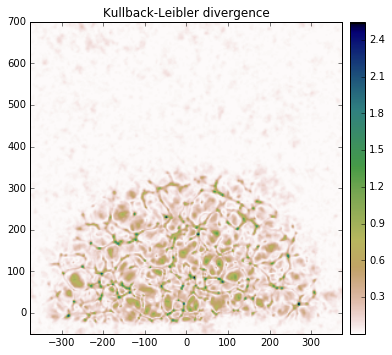

In [6]:
#Now make a example plot
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(diva_DKL[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], cmap="gist_earth_r")
ax.set_title("Kullback-Leibler divergence")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(im, cax=cax)
plt.show()

# Jensen-Shannon divergence diva-origami

In [7]:
#3D probabilistic maps for structures
V1=diva['voids']
S1=diva['sheets']
F1=diva['filaments']
C1=diva['clusters']
V2=origami['voids']
S2=origami['sheets']
F2=origami['filaments']
C2=origami['clusters']

In [8]:
# Jensen-Shannon divergence
Vm=1/2.*(V1+V2)
Sm=1/2.*(S1+S2)
Fm=1/2.*(F1+F2)
Cm=1/2.*(C1+C2)

V1logV1 = V1*np.log2(V1)
S1logS1 = S1*np.log2(S1)
F1logF1 = F1*np.log2(F1)
C1logC1 = C1*np.log2(C1)
V1logV1[np.isnan(V1logV1)]=0.
S1logS1[np.isnan(S1logS1)]=0.
F1logF1[np.isnan(F1logF1)]=0.
C1logC1[np.isnan(C1logC1)]=0.

V1logVm = V1*np.log2(Vm)
S1logSm = S1*np.log2(Sm)
F1logFm = F1*np.log2(Fm)
C1logCm = C1*np.log2(Cm)
V1logVm[np.isnan(V1logVm)]=0.
S1logSm[np.isnan(S1logSm)]=0.
F1logFm[np.isnan(F1logFm)]=0.
C1logCm[np.isnan(C1logCm)]=0.

DKL1m = V1logV1 + S1logS1 + F1logF1 + C1logC1 - V1logVm - S1logSm - F1logFm - C1logCm
del V1logV1, S1logS1, F1logF1, C1logC1, V1logVm, S1logSm, F1logFm, C1logCm

V2logV2 = V2*np.log2(V2)
S2logS2 = S2*np.log2(S2)
F2logF2 = F2*np.log2(F2)
C2logC2 = C2*np.log2(C2)
V2logV2[np.isnan(V2logV2)]=0.
S2logS2[np.isnan(S2logS2)]=0.
F2logF2[np.isnan(F2logF2)]=0.
C2logC2[np.isnan(C2logC2)]=0.

V2logVm = V2*np.log2(Vm)
S2logSm = S2*np.log2(Sm)
F2logFm = F2*np.log2(Fm)
C2logCm = C2*np.log2(Cm)
V2logVm[np.isnan(V2logVm)]=0.
S2logSm[np.isnan(S2logSm)]=0.
F2logFm[np.isnan(F2logFm)]=0.
C2logCm[np.isnan(C2logCm)]=0.

DKL2m = V2logV2 + S2logS2 + F2logF2 + C2logC2 - V2logVm - S2logSm - F2logFm - C2logCm
del V2logV2, S2logS2, F2logF2, C2logC2, V2logVm, S2logSm, F2logFm, C2logCm

DJS = 1/2.*(DKL1m + DKL2m)

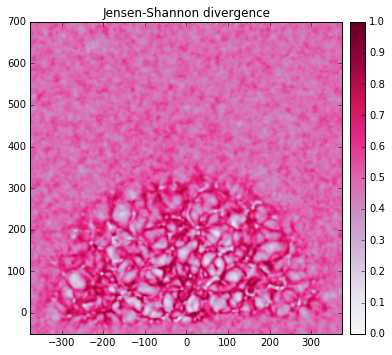

In [9]:
#Now make a example plot
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(DJS[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], vmin=0., vmax=1., cmap="PuRd")
ax.set_title("Jensen-Shannon divergence")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(im, cax=cax)
plt.show()

# Jensen-Shannon divergence for dark energy models

In [10]:
js_DE = np.load('borg_sdss_js_DE.npz')

#Minimum and maximum position along the x-axis in Mpc/h
xmin=js_DE['ranges'][0]
xmax=js_DE['ranges'][1]

#Minimum and maximum position along the y-axis in Mpc/h
ymin=js_DE['ranges'][2]
ymax=js_DE['ranges'][3]

#Minimum and maximum position along the z-axis in Mpc/h
zmin=js_DE['ranges'][4]
zmax=js_DE['ranges'][5]

#3D maps of Jensen-Shannon divergence between cosmic web-type posteriors for different dark energy models
tweb_js_DE=js_DE['tweb']
diva_js_DE=js_DE['diva']
origami_js_DE=js_DE['origami']

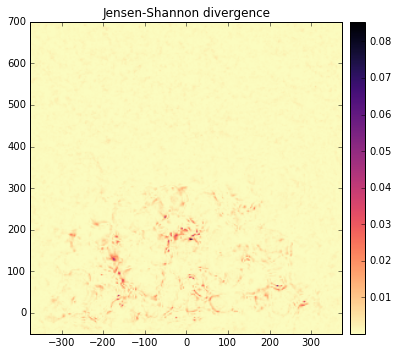

In [11]:
#Now make a example plot
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(diva_js_DE[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], cmap="magma_r")
ax.set_title("Jensen-Shannon divergence")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(im, cax=cax)
plt.show()

# Information gain on galaxy colors

In [12]:
#Load galaxy catalog
ra,dec,redshift,u,g,r,i,z,ugModelColor,grModelColor,riModelColor,izModelColor,Mr,is_red,tweb,diva,origami = np.loadtxt("galaxy_catalog.dat", comments="#", unpack=True)
is_red=is_red.astype(int)
tweb=tweb.astype(int)
diva=diva.astype(int)
origami=origami.astype(int)

## Information gain (parent)

In [13]:
Ntot=float(is_red.size)
Nred=float(np.sum(is_red==1))
Nblue=Ntot-Nred
H_parent = -Nred/Ntot*np.log2(Nred/Ntot) -Nblue/Ntot*np.log2(Nblue/Ntot)

## Information gain (T-web)

In [14]:
is_red_voids_tweb=is_red[np.where(tweb==0)]
Nvoids_tweb=float(is_red_voids_tweb.size)
Nred_voids_tweb=float(np.sum(is_red_voids_tweb==1))
Nblue_voids_tweb=Nvoids_tweb-Nred_voids_tweb
H_tweb_voids = -Nred_voids_tweb/Nvoids_tweb*np.log2(Nred_voids_tweb/Nvoids_tweb) -Nblue_voids_tweb/Nvoids_tweb*np.log2(Nblue_voids_tweb/Nvoids_tweb)

is_red_sheets_tweb=is_red[np.where(tweb==1)]
Nsheets_tweb=float(is_red_sheets_tweb.size)
Nred_sheets_tweb=float(np.sum(is_red_sheets_tweb==1))
Nblue_sheets_tweb=Nsheets_tweb-Nred_sheets_tweb
H_tweb_sheets = -Nred_sheets_tweb/Nsheets_tweb*np.log2(Nred_sheets_tweb/Nsheets_tweb) -Nblue_sheets_tweb/Nsheets_tweb*np.log2(Nblue_sheets_tweb/Nsheets_tweb)

is_red_filaments_tweb=is_red[np.where(tweb==2)]
Nfilaments_tweb=float(is_red_filaments_tweb.size)
Nred_filaments_tweb=float(np.sum(is_red_filaments_tweb==1))
Nblue_filaments_tweb=Nfilaments_tweb-Nred_filaments_tweb
H_tweb_filaments = -Nred_filaments_tweb/Nfilaments_tweb*np.log2(Nred_filaments_tweb/Nfilaments_tweb) -Nblue_filaments_tweb/Nfilaments_tweb*np.log2(Nblue_filaments_tweb/Nfilaments_tweb)

is_red_clusters_tweb=is_red[np.where(tweb==3)]
Nclusters_tweb=float(is_red_clusters_tweb.size)
Nred_clusters_tweb=float(np.sum(is_red_clusters_tweb==1))
Nblue_clusters_tweb=Nclusters_tweb-Nred_clusters_tweb
H_tweb_clusters = -Nred_clusters_tweb/Nclusters_tweb*np.log2(Nred_clusters_tweb/Nclusters_tweb) -Nblue_clusters_tweb/Nclusters_tweb*np.log2(Nblue_clusters_tweb/Nclusters_tweb)

# information gain, weighting using galaxies
H_tweb = Nvoids_tweb/Ntot*H_tweb_voids + Nsheets_tweb/Ntot*H_tweb_sheets + Nfilaments_tweb/Ntot*H_tweb_filaments + Nclusters_tweb/Ntot*H_tweb_clusters
IG_tweb = H_parent - H_tweb

In [15]:
IG_tweb

0.01520750251568681

## Information gain (diva)

In [16]:
is_red_voids_diva=is_red[np.where(diva==0)]
Nvoids_diva=float(is_red_voids_diva.size)
Nred_voids_diva=float(np.sum(is_red_voids_diva==1))
Nblue_voids_diva=Nvoids_diva-Nred_voids_diva
H_diva_voids = -Nred_voids_diva/Nvoids_diva*np.log2(Nred_voids_diva/Nvoids_diva) -Nblue_voids_diva/Nvoids_diva*np.log2(Nblue_voids_diva/Nvoids_diva)

is_red_sheets_diva=is_red[np.where(diva==1)]
Nsheets_diva=float(is_red_sheets_diva.size)
Nred_sheets_diva=float(np.sum(is_red_sheets_diva==1))
Nblue_sheets_diva=Nsheets_diva-Nred_sheets_diva
H_diva_sheets = -Nred_sheets_diva/Nsheets_diva*np.log2(Nred_sheets_diva/Nsheets_diva) -Nblue_sheets_diva/Nsheets_diva*np.log2(Nblue_sheets_diva/Nsheets_diva)

is_red_filaments_diva=is_red[np.where(diva==2)]
Nfilaments_diva=float(is_red_filaments_diva.size)
Nred_filaments_diva=float(np.sum(is_red_filaments_diva==1))
Nblue_filaments_diva=Nfilaments_diva-Nred_filaments_diva
H_diva_filaments = -Nred_filaments_diva/Nfilaments_diva*np.log2(Nred_filaments_diva/Nfilaments_diva) -Nblue_filaments_diva/Nfilaments_diva*np.log2(Nblue_filaments_diva/Nfilaments_diva)

is_red_clusters_diva=is_red[np.where(diva==3)]
Nclusters_diva=float(is_red_clusters_diva.size)
Nred_clusters_diva=float(np.sum(is_red_clusters_diva==1))
Nblue_clusters_diva=Nclusters_diva-Nred_clusters_diva
H_diva_clusters = -Nred_clusters_diva/Nclusters_diva*np.log2(Nred_clusters_diva/Nclusters_diva) -Nblue_clusters_diva/Nclusters_diva*np.log2(Nblue_clusters_diva/Nclusters_diva)

# information gain, weighting using galaxies
H_diva = Nvoids_diva/Ntot*H_diva_voids + Nsheets_diva/Ntot*H_diva_sheets + Nfilaments_diva/Ntot*H_diva_filaments + Nclusters_diva/Ntot*H_diva_clusters
IG_diva = H_parent - H_diva

In [17]:
IG_diva

0.010109875962712733

## Information gain (origami)

In [18]:
is_red_voids_origami=is_red[np.where(origami==0)]
Nvoids_origami=float(is_red_voids_origami.size)
Nred_voids_origami=float(np.sum(is_red_voids_origami==1))
Nblue_voids_origami=Nvoids_origami-Nred_voids_origami
H_origami_voids = -Nred_voids_origami/Nvoids_origami*np.log2(Nred_voids_origami/Nvoids_origami) -Nblue_voids_origami/Nvoids_origami*np.log2(Nblue_voids_origami/Nvoids_origami)

is_red_sheets_origami=is_red[np.where(origami==1)]
Nsheets_origami=float(is_red_sheets_origami.size)
Nred_sheets_origami=float(np.sum(is_red_sheets_origami==1))
Nblue_sheets_origami=Nsheets_origami-Nred_sheets_origami
H_origami_sheets = -Nred_sheets_origami/Nsheets_origami*np.log2(Nred_sheets_origami/Nsheets_origami) -Nblue_sheets_origami/Nsheets_origami*np.log2(Nblue_sheets_origami/Nsheets_origami)

is_red_filaments_origami=is_red[np.where(origami==2)]
Nfilaments_origami=float(is_red_filaments_origami.size)
Nred_filaments_origami=float(np.sum(is_red_filaments_origami==1))
Nblue_filaments_origami=Nfilaments_origami-Nred_filaments_origami
H_origami_filaments = -Nred_filaments_origami/Nfilaments_origami*np.log2(Nred_filaments_origami/Nfilaments_origami) -Nblue_filaments_origami/Nfilaments_origami*np.log2(Nblue_filaments_origami/Nfilaments_origami)

is_red_clusters_origami=is_red[np.where(origami==3)]
Nclusters_origami=float(is_red_clusters_origami.size)
Nred_clusters_origami=float(np.sum(is_red_clusters_origami==1))
Nblue_clusters_origami=Nclusters_origami-Nred_clusters_origami
H_origami_clusters = -Nred_clusters_origami/Nclusters_origami*np.log2(Nred_clusters_origami/Nclusters_origami) -Nblue_clusters_origami/Nclusters_origami*np.log2(Nblue_clusters_origami/Nclusters_origami)

# information gain, weighting using galaxies
H_origami = Nvoids_origami/Ntot*H_origami_voids + Nsheets_origami/Ntot*H_origami_sheets + Nfilaments_origami/Ntot*H_origami_filaments + Nclusters_origami/Ntot*H_origami_clusters
IG_origami = H_parent - H_origami

In [19]:
IG_origami

0.014293651805665553